# 데이터 불러오기 및 패키지 로딩

In [ ]:
import warnings
warnings.filterwarnings("ignore")
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

import pandas as pd
from sklearn.model_selection import KFold
from sklearn.metrics import make_scorer, roc_curve, roc_auc_score, confusion_matrix
from sklearn.model_selection import cross_validate, cross_val_score, GridSearchCV, StratifiedKFold
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve,auc,classification_report
from scipy import interp

### 코랩용

In [ ]:
from google.colab import files 
myfile = files.upload()

import io 
import pandas as pd

HRV = pd.read_csv(io.BytesIO(myfile['HRV.csv']), encoding='CP949')
EEG = pd.read_csv(io.BytesIO(myfile['EEG.csv']), encoding='CP949')
clinical = pd.read_csv(io.BytesIO(myfile['clinical.csv']), encoding='CP949')

EEGHRV = pd.read_csv(io.BytesIO(myfile['EEGHRV.csv']), encoding='CP949')
HRVCli = pd.read_csv(io.BytesIO(myfile['HRVCli.csv']), encoding='CP949')
EEGCli = pd.read_csv(io.BytesIO(myfile['EEGCli.csv']), encoding='CP949')

EEGHRVCli = pd.read_csv(io.BytesIO(myfile['EEGHRVCli.csv']), encoding='CP949')

Saving clinical.csv to clinical.csv
Saving EEG.csv to EEG.csv
Saving EEGCli.csv to EEGCli.csv
Saving EEGHRV.csv to EEGHRV.csv
Saving EEGHRVCli.csv to EEGHRVCli.csv
Saving HRV.csv to HRV.csv
Saving HRVCli.csv to HRVCli.csv


In [ ]:
from google.colab import files 
myfile = files.upload()

file = pd.read_csv(io.BytesIO(myfile['EEG_class4_selected_vars.xlsx']), encoding='cp949')


from google.colab import files 
myfile = files.upload()

import io 
import pandas as pd

HRV = pd.read_csv(io.BytesIO(myfile['HRV.csv'], encoding='CP949'))
EEG = pd.read_csv(io.BytesIO(myfile['EEG.csv'], encoding='CP949'))
clinical = pd.read_csv(io.BytesIO(myfile['clinical.csv'], encoding='CP949'))

EEGHRV = pd.read_csv(io.BytesIO(myfile['EEGHRV.csv'], encoding='CP949'))
HRVCli = pd.read_csv(io.BytesIO(myfile['HRVCli.csv'], encoding='CP949'))
EEGCli = pd.read_csv(io.BytesIO(myfile['EEGCli.csv'], encoding='CP949'))

EEGHRVCli = pd.read_csv(io.BytesIO(myfile['EEGHRVCli.csv'], encoding='CP949'))

### jupyter notebook

In [ ]:
HRV = pd.read_csv('HRV.csv', encoding='CP949')
EEG = pd.read_csv('EEG.csv', encoding='CP949')
clinical = pd.read_csv('clinical.csv', encoding='CP949')

EEGHRV = pd.read_csv('EEGHRV.csv', encoding='CP949')
HRVCli = pd.read_csv('HRVCli.csv', encoding='CP949')
EEGCli = pd.read_csv('EEGCli.csv', encoding='CP949')

EEGHRVCli = pd.read_csv('EEGHRVCli.csv', encoding='CP949')

In [ ]:
# 중복으로 들어간 변수 있는 지 확인
print(len(HRV.columns) == len(set(HRV.columns))) 
print(len(EEG.columns) == len(set(EEG.columns))) 
print(len(clinical.columns) == len(set(clinical.columns))) 
print(len(EEGHRV.columns) == len(set(EEGHRV.columns))) 
print(len(HRVCli.columns) == len(set(HRVCli.columns))) 
print(len(EEGCli.columns) == len(set(EEGCli.columns))) 
print(len(EEGHRVCli.columns) == len(set(EEGHRVCli.columns))) 

True
True
True
True
True
True
True


In [ ]:
HRV.columns = [re.sub("\(|\)|\-|\ ",".",HRV.columns.values[i]) for i in range(0,len(HRV.columns.values))]
EEG.columns = [re.sub("\(|\)|\-|\ ",".",EEG.columns.values[i]) for i in range(0,len(EEG.columns.values))]
clinical.columns = [re.sub("\(|\)|\-|\ ",".",clinical.columns.values[i]) for i in range(0,len(clinical.columns.values))]
EEGHRV.columns = [re.sub("\(|\)|\-|\ ",".",EEGHRV.columns.values[i]) for i in range(0,len(EEGHRV.columns.values))]
HRVCli.columns = [re.sub("\(|\)|\-|\ ",".",HRVCli.columns.values[i]) for i in range(0,len(HRVCli.columns.values))]
EEGCli.columns = [re.sub("\(|\)|\-|\ ",".",EEGCli.columns.values[i]) for i in range(0,len(EEGCli.columns.values))]
EEGHRVCli.columns = [re.sub("\(|\)|\-|\ ",".",EEGHRVCli.columns.values[i]) for i in range(0,len(EEGHRVCli.columns.values))]

In [ ]:
clinical.rename(columns = {'3.education' : 'X3.education', '5.marriage' : 'X5.marriage'}, inplace = True)
HRVCli.rename(columns = {'3.education' : 'X3.education', '5.marriage' : 'X5.marriage'}, inplace = True)
EEGCli.rename(columns = {'3.education' : 'X3.education', '5.marriage' : 'X5.marriage'}, inplace = True)
EEGHRVCli.rename(columns = {'3.education' : 'X3.education', '5.marriage' : 'X5.marriage'}, inplace = True)

## Boxplot

In [ ]:
def plot_boxplot(var):
    
    hc = clinical.loc[clinical.group == 'HC',f'{var}']
    aud = clinical.loc[clinical.group == 'AUD',f'{var}']
    igd = clinical.loc[clinical.group == 'IGD',f'{var}']
    
    fig = plt.figure(figsize =(8, 8))
    plt.boxplot([hc,aud,igd],labels=['HC','AUD','IGD'],widths=0.7)
    plt.title(f'Boxplot of {var} (by group)')
    
    plt.show()

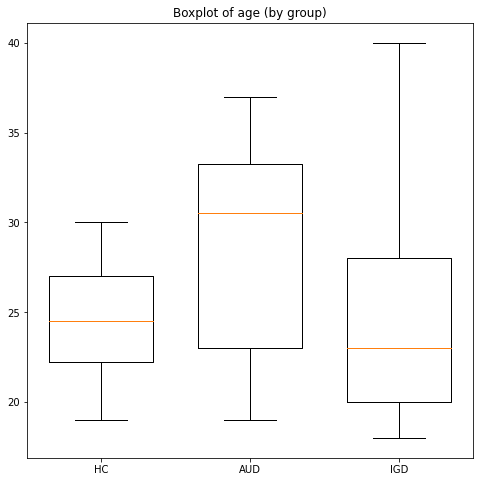

In [ ]:
plot_boxplot(var='age')

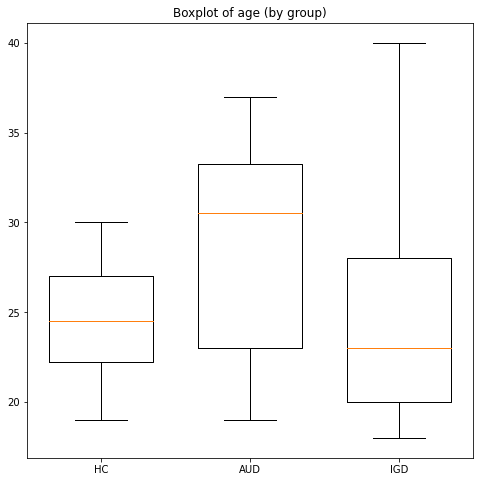

None


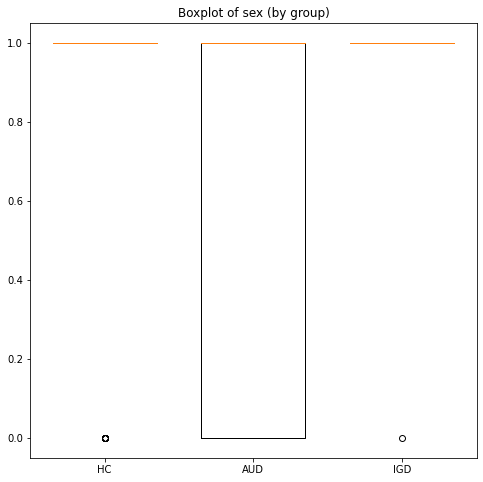

None


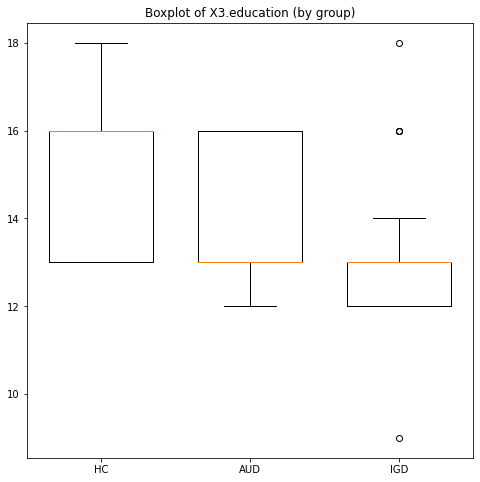

None


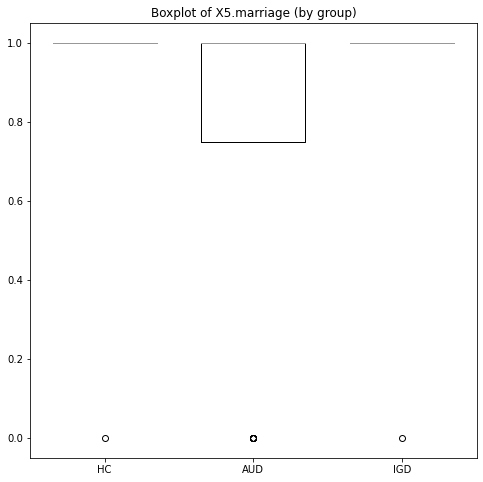

None


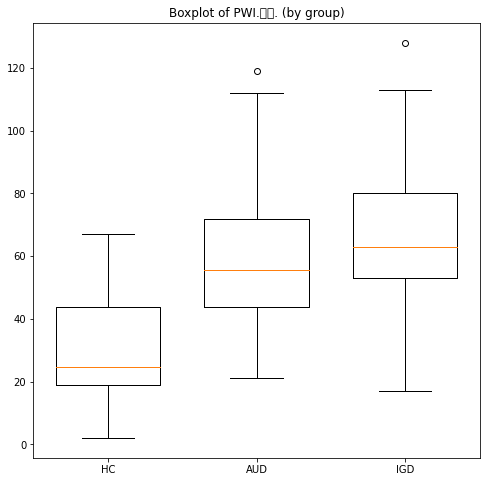

None


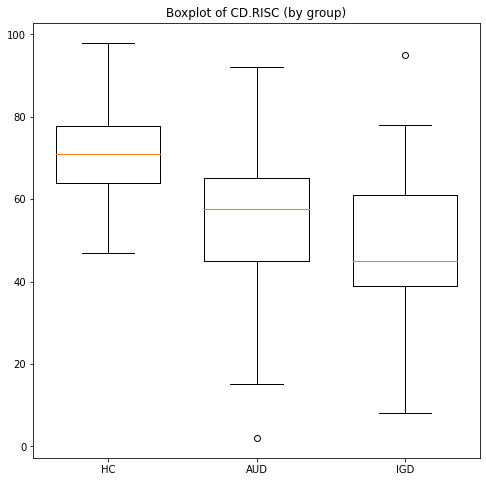

None


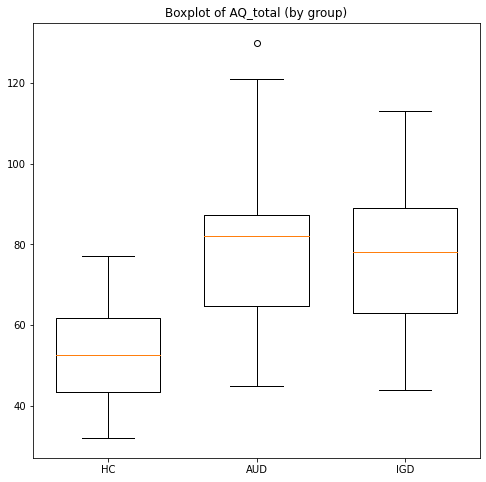

None


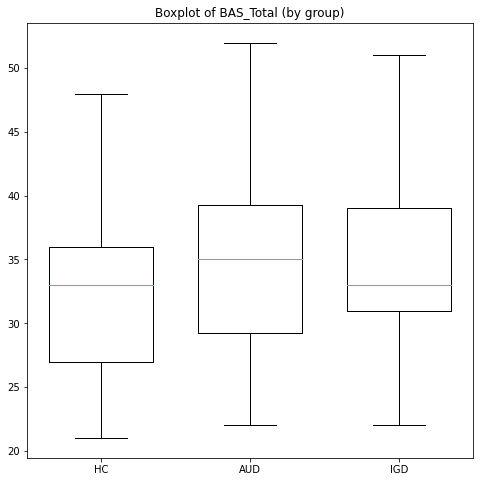

None


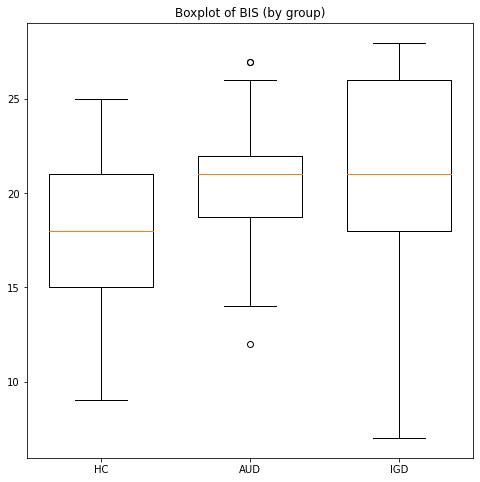

None


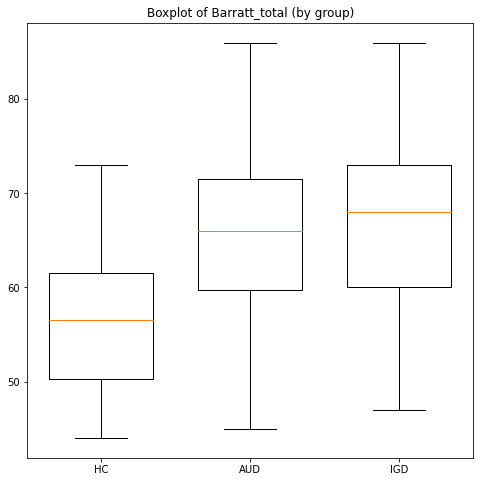

None


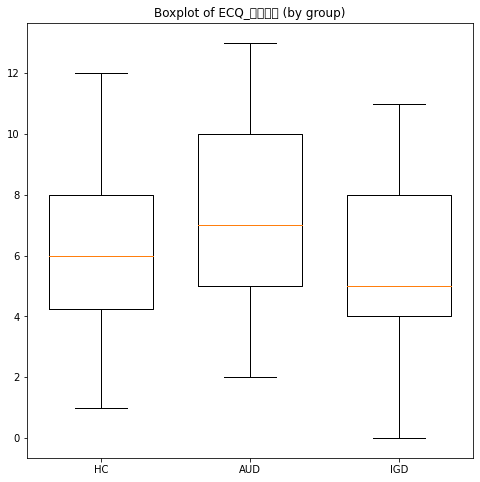

None


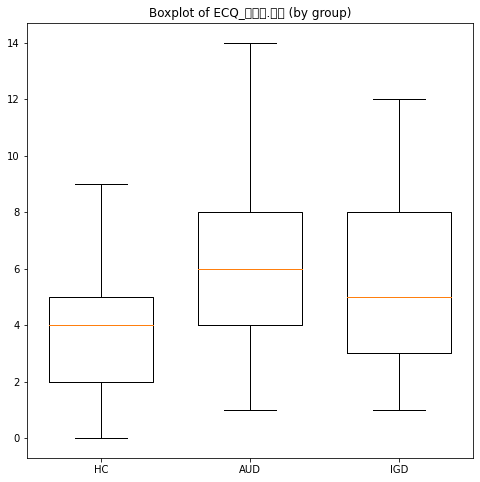

None


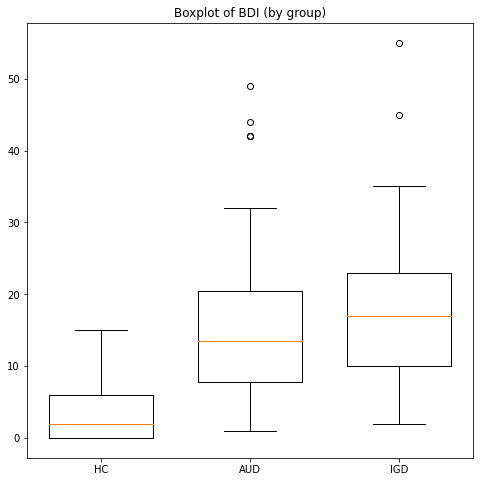

None


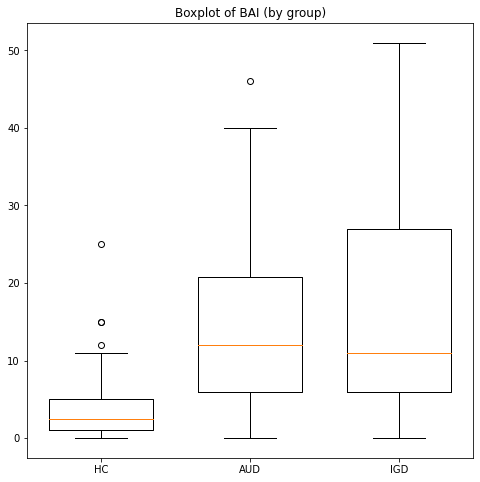

None


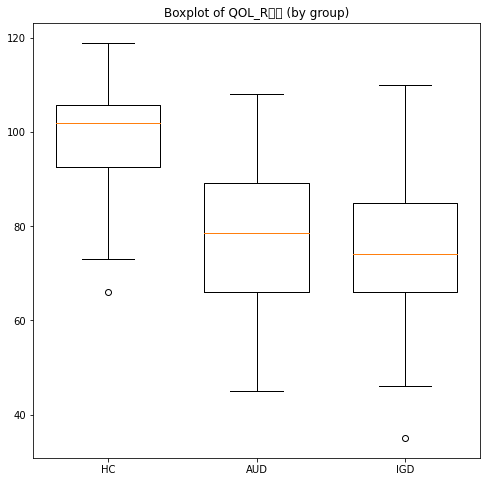

None


In [ ]:
for i in range(1,len(clinical.columns)):
    print(plot_boxplot(var=clinical.columns[i]))

# 전처리

## fold setting

In [ ]:
def sklearn_sffold_split(X,y,K):
    kf =  StratifiedKFold(n_splits = K ,shuffle=True, random_state=2022)
    result = [(train_index, test_index) for train_index, test_index in kf.split(X,y)]
    return result

## pre_processing function 
### 3 class



In [ ]:
def feature_selected(feature_lst):
    
    final_lst = []
    rmv_lst = ['age','sex','group']

    for i in range(5):
        
        fold_lst = feature_lst.iloc[:,i].dropna().tolist()
        fold_lst = [s for s in fold_lst if s not in rmv_lst] # 중복방지.. 껴있으면 지우기
        fold_lst = fold_lst + rmv_lst 
        final_lst.append(fold_lst)
    
    return final_lst # 선택된 변수만 가지고 있는..

In [ ]:
## 3-class 용

def pre_process_3(data,file_name,method=0): # 7개의 data , cls3개 총 21개 경우의 수해당 features 파일 , sis method(3개) , cls 3개 / 
    if (file_name == "None") :
        
        feature_lst = []
        for i in range(5):
            feature_lst.append(data.columns)

    else :
        feature_lst = pd.read_excel(file_name,sheet_name = method)
        feature_lst = feature_selected(feature_lst)
    
    X = data.drop(['group'],axis=1)
    y = data.group
    folds=sklearn_sffold_split(X,y ,5)

    train, test = [],[]

    for i in range(0,5): 
        train.append(data.iloc[folds[i][0]].reset_index(drop=True))
        test.append(data.iloc[folds[i][1]].reset_index(drop=True))
        train[i] = train[i][feature_lst[i]]
        test[i] = test[i][feature_lst[i]]

    final_train = train ; final_test = test
    
    for i in range(5):
        final_train[i]['group'] = final_train[i].group.replace({'HC':0, 'AUD':1, 'IGD':2}).astype('category')
        final_test[i]['group'] = final_test[i].group.replace({'HC':0, 'AUD':1, 'IGD':2}).astype('category')

        
    return final_train , final_test

In [ ]:
# Scaling
def scaling(train,test):
    
    trains , tests = [],[]
    rmv_lst = ['group','sex','X5.marriage']
     
    for i in range(5):
        
        apend_lst = [s for s in rmv_lst if s in train[i].columns ]
        scale_lst = [s for s in train[i].columns if s not in rmv_lst ]   
        
        scaler = StandardScaler()
        trains.append(pd.DataFrame(scaler.fit_transform(train[i][scale_lst]),
                                   index=train[i].index, columns=train[i][scale_lst].columns))
        trains[i][apend_lst] = train[i][apend_lst]

        
        tests.append(pd.DataFrame(scaler.transform(test[i][scale_lst]), 
                                   index=test[i].index, columns=test[i][scale_lst].columns))
        tests[i][apend_lst] = test[i][apend_lst]

        
        
    return trains, tests

## tunning function
* input : train, test, selected_vars

In [ ]:
# 3-class

In [ ]:
from sklearn.preprocessing import label_binarize

def Mytunning3(trains,tests):
    ela_auc, rf_auc, gbm_auc, xgb_auc =[],[],[],[]
    ela_matrix, rf_matrix, gbm_matrix, xgb_matrix = np.array([[0,0,0],[0,0,0],[0,0,0]]),np.array([[0,0,0],[0,0,0],[0,0,0]]),np.array([[0,0,0],[0,0,0],[0,0,0]]),np.array([[0,0,0],[0,0,0],[0,0,0]])

    tprs_ela,tprs_rf,tprs_gbm,tprs_xgb = [[],[],[],[],[]],[[],[],[],[],[]],[[],[],[],[],[]],[[],[],[],[],[]]
    fprs = [dict(),dict(),dict(),dict(),dict()]
    tprs = [dict(),dict(),dict(),dict(),dict()]
    mean_tpr_ela,mean_tpr_rf,mean_tpr_gbm,mean_tpr_xgb = [0,0,0],[0,0,0],[0,0,0],[0,0,0]
    mean_fpr = np.linspace(0,1,100)
   
    for i in range(0,5):
        print(f'####################### fold {i} ########################')
        # train 지정 
        train = trains[i]
        
        X = train.drop('group',1)
        y = train.group

        
        myscore_grid = make_scorer(roc_auc_score, multi_class='ovr',needs_proba=True)


        ####### 모델링 #######
        # elastic-net
        parameters = {'C':[0.001, 0.01, 0.1, 1],
                     'l1_ratio': [0, 0.1, 0.3, 0.5, 0.7, 0.9, 1]}
        ela = LogisticRegression(penalty='elasticnet', multi_class='multinomial', solver='saga',random_state=2022)
        grid = GridSearchCV(ela, parameters, cv=5, scoring = myscore_grid)
        grid.fit(X, y)
        ela = grid.best_estimator_
        ela.fit(X, y)
        print(ela)
        
        
        # rf
        parameters = {'max_depth': [5, 10, 15],
                    'max_features': ['auto', 'sqrt'],
                    'min_samples_leaf': [1, 2, 4],
                    'min_samples_split': [2, 5, 10],
                    'n_estimators': [100, 200, 500]}

        rnd = RandomForestClassifier(random_state=2022)
        grid = GridSearchCV(rnd, parameters, cv=5,scoring = myscore_grid)
        grid.fit(X, y)
        rf = grid.best_estimator_
        rf.fit(X, y)
        print(rf)

        # gbm
        parameters = {'max_depth': [5, 8 ,10],
                    'min_samples_leaf': [2, 4],
                    'min_samples_split': [2, 5],
                    'n_estimators': [100, 200, 500],
                  'learning_rate': [0.01, 0.05, 0.1]}

        gbm = GradientBoostingClassifier(random_state=2022)
        grid = GridSearchCV(gbm, parameters,cv=5, scoring = myscore_grid)
        grid.fit(X, y)
        gbm = grid.best_estimator_
        gbm.fit(X, y)
        print(gbm)

        # xgb
        parameters = {'min_child_weight': [1, 3, 5],
                      'gamma': [0.5, 1, 1.5],
                      'max_depth': [5, 8 ,10],
                      'subsample': [0.6, 0.8],
                      'colsample_bytree': [0.6, 0.8],
                      'learning_rate' : [0.01, 0.1],
                      'n_estimators' : [100, 200, 500]}
        xgb = XGBClassifier(nthread=1,random_state=2022,eval_metric='mlogloss')
        grid = GridSearchCV(xgb, parameters,cv=5, scoring = myscore_grid )
        grid.fit(X, y)
        xgb = grid.best_estimator_
        xgb.fit(X, y)
        print(xgb)


        # 각각 fold 내에서 모델마다 auc 저장 (test_score)
    
        test = tests[i]
        X_test = test.drop('group',1)
        y_test = test.group
        
        ela_auc.append(roc_auc_score(y_test, ela.predict_proba(X_test), multi_class='ovr'))
        rf_auc.append(roc_auc_score(y_test, rf.predict_proba(X_test), multi_class='ovr'))
        gbm_auc.append(roc_auc_score(y_test, gbm.predict_proba(X_test), multi_class='ovr'))
        xgb_auc.append(roc_auc_score(y_test, xgb.predict_proba(X_test), multi_class='ovr'))
        
        ela_matrix=np.add(ela_matrix, confusion_matrix(y_test, ela.predict(X_test)))
        rf_matrix=np.add(rf_matrix, confusion_matrix(y_test, rf.predict(X_test)))
        gbm_matrix=np.add(gbm_matrix, confusion_matrix(y_test, gbm.predict(X_test)))
        xgb_matrix=np.add(xgb_matrix, confusion_matrix(y_test, xgb.predict(X_test)))
        
        # 각각 fold 내에서 모델마다 roc 저장(interp: 5 fold 평균을 내기 위해 등간격으로 값을 맞춰주어야함)
        y_test = label_binarize(y_test, classes=[0, 1, 2])
        
        for j in range(3):
            fprs[i][j], tprs[i][j], _ = roc_curve(y_test[:, j], ela.predict_proba(X_test)[:, j])          
            tprs_ela[i].append(interp(mean_fpr, np.stack(fprs[i][j]).astype('float'), np.stack(tprs[i][j]).astype('float')))
            
        for j in range(3):
            fprs[i][j], tprs[i][j], _ = roc_curve(y_test[:, j], rf.predict_proba(X_test)[:, j])          
            tprs_rf[i].append(interp(mean_fpr, np.stack(fprs[i][j]).astype('float'), np.stack(tprs[i][j]).astype('float')))
    
        for j in range(3):
            fprs[i][j], tprs[i][j], _ = roc_curve(y_test[:, j], gbm.predict_proba(X_test)[:, j])          
            tprs_gbm[i].append(interp(mean_fpr, np.stack(fprs[i][j]).astype('float'), np.stack(tprs[i][j]).astype('float')))
    
        for j in range(3):
            fprs[i][j], tprs[i][j], _ = roc_curve(y_test[:, j], xgb.predict_proba(X_test)[:, j])          
            tprs_xgb[i].append(interp(mean_fpr, np.stack(fprs[i][j]).astype('float'), np.stack(tprs[i][j]).astype('float')))
    
         
    # 최종 평균 auc 출력 (모델마다)
    print('ela_auc:',ela_auc)
    print('rf_auc:',rf_auc)
    print('gbm_auc:',gbm_auc)
    print('xgb_auc:',xgb_auc)
    
    # confusion matrix로 성능지표 계산
    matrix_list = [ela_matrix, rf_matrix, gbm_matrix, xgb_matrix]
    for matrix in matrix_list:
        acc = (matrix[0][0] + matrix[1][1]+ matrix[2][2]) / sum(sum(matrix))
        rec = [matrix[0][0] / (matrix[0][0]+matrix[0][1]+matrix[0][2]),
               matrix[1][1] / (matrix[1][1]+matrix[1][0]+matrix[1][2]),
               matrix[2][2] / (matrix[2][2]+matrix[2][0]+matrix[2][1])]
        pre = [matrix[0][0] / (matrix[0][0]+matrix[1][0]+matrix[2][0]),
               matrix[1][1] / (matrix[1][1]+matrix[0][1]+matrix[2][1]),
               matrix[2][2] / (matrix[2][2]+matrix[0][2]+matrix[1][2])]
        f1 = [2*(rec[0]*pre[0])/(rec[0]+pre[0]),2*(rec[1]*pre[1])/(rec[1]+pre[1]),2*(rec[2]*pre[2])/(rec[2]+pre[2])]
        print(matrix)
        print('accuracy:',acc,'f1-score:',f1,'recall:',rec,'precision:',pre)

    
    print('ela_mean_auc:',np.mean(ela_auc))
    print('rf_mean_auc:',np.mean(rf_auc))
    print('gbm_mean_auc:',np.mean(gbm_auc))
    print('xgb_mean_auc:',np.mean(xgb_auc))
    
    # 평균 roc 저장 
    for j in range(3):
        mean_tpr_ela[j] = np.mean(tprs_ela[:][j], axis=0)
        mean_tpr_rf[j] = np.mean(tprs_rf[:][j], axis=0)
        mean_tpr_gbm[j] = np.mean(tprs_gbm[:][j], axis=0)
        mean_tpr_xgb[j] = np.mean(tprs_xgb[:][j], axis=0)
    
    return mean_tpr_ela, mean_tpr_rf, mean_tpr_gbm, mean_tpr_xgb

# Experiment - 변수 모두 이용

# <3-class> 파일이름 수정하기!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

In [ ]:
train,test = pre_process_3(EEG,file_name = '.xlsx', method = 0)
train, test = scaling(train,test)
sis_eeg = Mytunning3(train,test)

In [ ]:
train,test = pre_process_3(EEGHRV,file_name = '.xlsx', method = 0)
train, test = scaling(train,test)
sis_eeghrv = Mytunning3(train,test) 

In [ ]:
train,test = pre_process_3(EEGHRVCli,file_name = '.xlsx', method = 0)
train, test = scaling(train,test)
sis_eeghrvcli = Mytunning3(train,test)

In [ ]:
mean_sis1_best, mean_sis2_best, mean_whole_best = cl4_sis1_eeghrv[3], cl4_sis2_eeghrv[0], cl4_eeghrv_whole[1]

mean_fpr = [0] + list(np.linspace(0,1,100))
plt.rcParams["figure.figsize"] = (21,7)

name_list = ['HC vs. rest', 'AUD vs. rest', 'IGD vs. rest']

for i in range(3):
    plt.subplot(1, 3, i+1) 

    mean_sis1_best_2 = [0]+list(mean_sis1_best[i])
    mean_sis2_best_2 = [0]+list(mean_sis2_best[i])
    mean_whole_best_2 = [0]+list(mean_whole_best[i])

    plt.plot(mean_fpr, mean_sis1_best_2, color='red',label=r'[SIS1] XGB',lw=1, alpha=1)
    plt.plot(mean_fpr, mean_sis2_best_2, color='green',label=r'[SIS2] ElasticNet', lw=1, alpha=1)
    plt.plot(mean_fpr, mean_whole_best_2, color='blue',label=r'[Whole] RF',lw=1, alpha=1)
    plt.plot(mean_fpr, mean_fpr, color='grey',lw=1, alpha=1, linestyle='--')
    plt.title('ROC Curve of '+ name_list[i] +' Classification (EEG, HRV)')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right', prop={'size': 12})
    
    
plt.show()

In [ ]:
# plot title 변경
mean_sis1_best, mean_sis2_best, mean_whole_best = cl4_sis1_eeghrv[3], cl4_sis2_eeghrv[0], cl4_eeghrv_whole[1]

mean_fpr = [0] + list(np.linspace(0,1,100))
plt.rcParams["figure.figsize"] = (21,7)

for i in range(3):
    plt.subplot(1, 3, i+1) 

    mean_sis1_best_2 = [0]+list(mean_sis1_best[i])
    mean_sis2_best_2 = [0]+list(mean_sis2_best[i])
    mean_whole_best_2 = [0]+list(mean_whole_best[i])

    plt.plot(mean_fpr, mean_sis1_best_2, color='red',label=r'[SIS1] XGB',lw=1, alpha=1)
    plt.plot(mean_fpr, mean_sis2_best_2, color='green',label=r'[SIS2] ElasticNet', lw=1, alpha=1)
    plt.plot(mean_fpr, mean_whole_best_2, color='blue',label=r'[Whole] RF',lw=1, alpha=1)
    plt.plot(mean_fpr, mean_fpr, color='grey',lw=1, alpha=1, linestyle='--')
    plt.title('ROC Curve of 3 Class Classification (EEG, HRV)')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right', prop={'size': 12})
    
    
plt.show()

In [ ]:
def plot_roc_curve_3(Mytunning3, dataset, filename): # name_lst : 뭐 분류하는지 , dataset, filename : 저장 어케할건지

    mean_tpr_ela3, mean_tpr_rf3, mean_tpr_gbm3, mean_tpr_xgb3 = Mytunning3[0], Mytunning3[1], Mytunning3[2], Mytunning3[3]

    mean_fpr = [0] + list(np.linspace(0,1,100))
    plt.rcParams["figure.figsize"] = (21,7)

    for i in range(3):
        plt.subplot(1, 3, i+1) 
        
        mean_tpr_ela = [0]+list(mean_tpr_ela3[i])
        mean_tpr_rf = [0]+list(mean_tpr_rf3[i])
        mean_tpr_gbm = [0]+list(mean_tpr_gbm3[i])
        mean_tpr_xgb = [0]+list(mean_tpr_xgb3[i])

        plt.plot(mean_fpr, mean_tpr_ela, color='red',label=r'ElasticNet',lw=1, alpha=1)
        plt.plot(mean_fpr, mean_tpr_rf, color='green',label=r'RF',lw=1, alpha=1)
        plt.plot(mean_fpr, mean_tpr_gbm, color='blue',label=r'GBM',lw=1, alpha=1)
        plt.plot(mean_fpr, mean_tpr_xgb, color='orange',label=r'XGB',lw=1, alpha=1)
        plt.plot(mean_fpr, mean_fpr, color='grey',lw=1, alpha=1, linestyle='--')
        plt.title('ROC Curve of 3 Class Classification ('+dataset+')')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.legend(loc='lower right', prop={'size': 12})
        
        
    plt.show()
    #plt.savefig(f'{filename}.png')

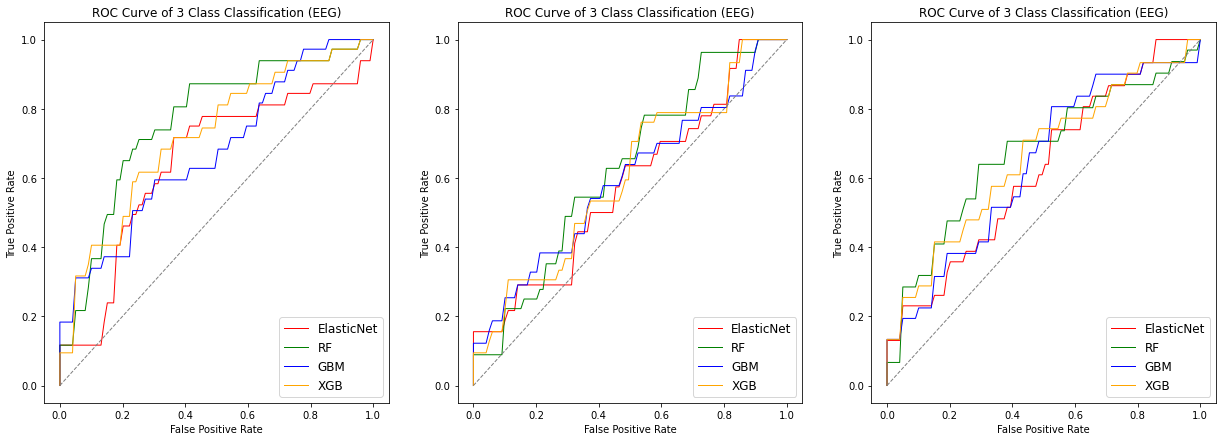

<Figure size 1512x504 with 0 Axes>

In [ ]:
plot_roc_curve_3(sis_eeg,'EEG','sis_eeg')

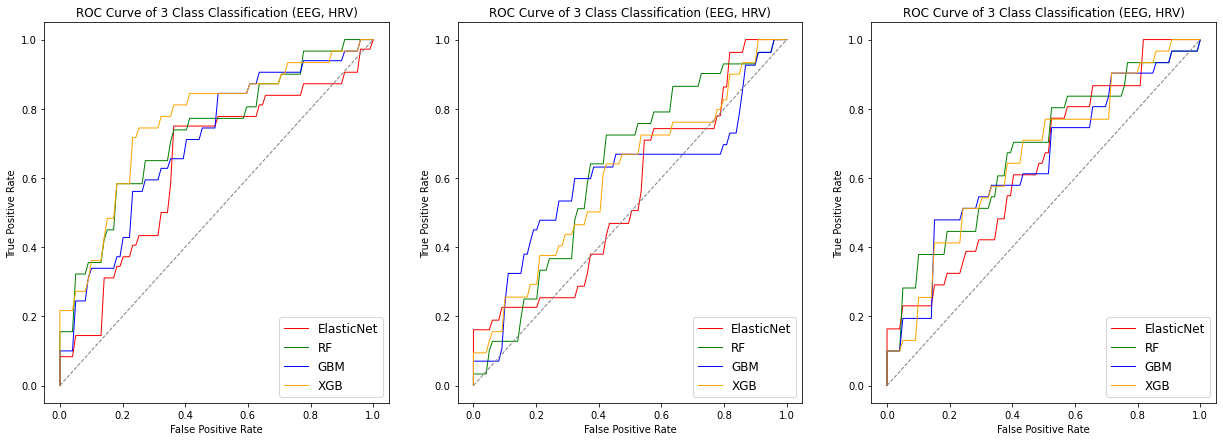

In [ ]:
plot_roc_curve_3(sis_eeghrv,'EEG, HRV','sis_eeghrv')

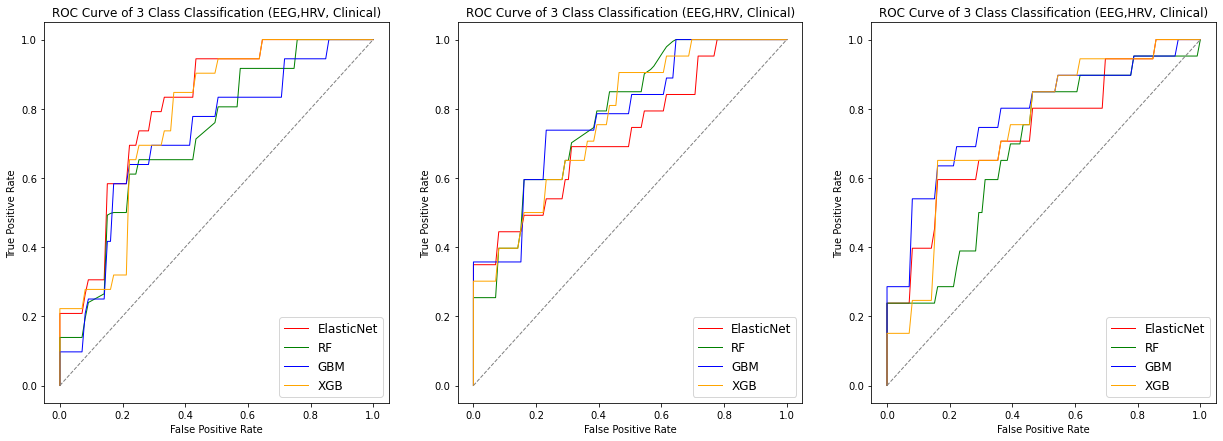

In [ ]:
plot_roc_curve_3(sis_eeghrvcli,'EEG,HRV, Clinical','sis_eeghrvcli')